<a href="https://colab.research.google.com/github/hy2632/SystematicTrading/blob/main/StockPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as pdr
from pandas_datareader import data
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

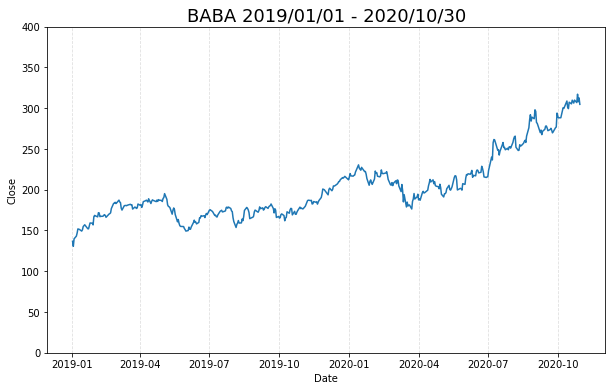

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,6))

fig.canvas.set_window_title("BABA 2019/01/01 - 2020/10/30")
ax1.set_title("BABA 2019/01/01 - 2020/10/30", fontdict={"size":18})
ax1.set_xlabel("Date")
ax1.xaxis.grid(True, linestyle="--", which='major', color='grey', alpha=0.25)
ax1.set_ylabel("Close")
ax1.set_ylim(0,np.ceil(np.max(babaDf.Close) / 100)*100)

ax1.plot(babaDf.index, babaDf.Close)

plt.show()

In [ ]:
def plot_Stock_Price(start_date, end_date, *stock_names, figsize=(10,6)):
    df = [data.get_data_yahoo(stock_name, start_date, end_date) for stock_name in stock_names]
    fig, ax1 = plt.subplots(figsize = figsize)

    # ax1.set_title(f"{stock_name} {start_date} - {end_date}", fontdict={"size":20})
    ax1.set_xlabel("date")
    ax1.xaxis.grid(True, which="major", color='gray', linestyle="--", alpha=0.25)
    

    ax1.set_ylabel("$ Close")
    ax1.yaxis.grid(True, which="major", color='gray', linestyle="--", alpha=0.25)

    maxClose = [np.max(stock["Close"]) for stock in df]
    globalMaxClose = np.max(maxClose)
    # Get the order of magnitude of maximum of $Close
    magnitude = np.floor(np.log10(globalMaxClose))
    ax1.set_ylim(bottom=0, top = np.ceil(globalMaxClose/10**(magnitude))*10**(magnitude))
    
    for stock in df:
        ax1.plot(stock.index, stock["Close"])
    
    ax1.legend(stock_names)

    plt.show()


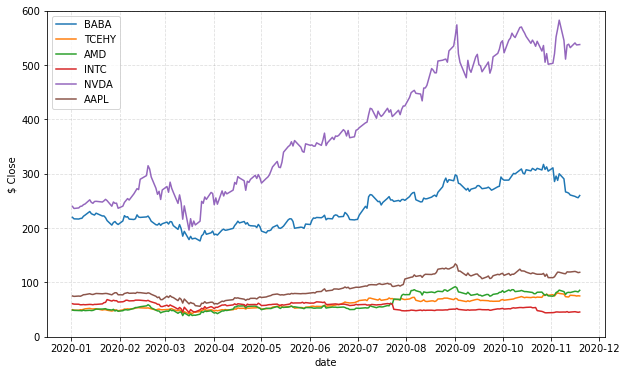

In [ ]:
plot_Stock_Price("2020-01-01", "2020-11-19", "BABA", "TCEHY", "AMD", "INTC", "NVDA", "AAPL")

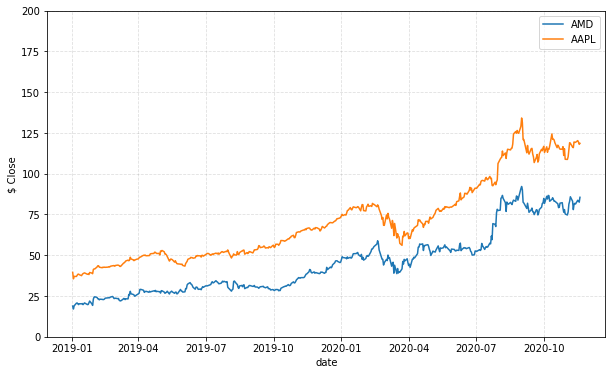

In [ ]:
plot_Stock_Price("2019-01-01", "2020-11-19", "AMD",  "AAPL")

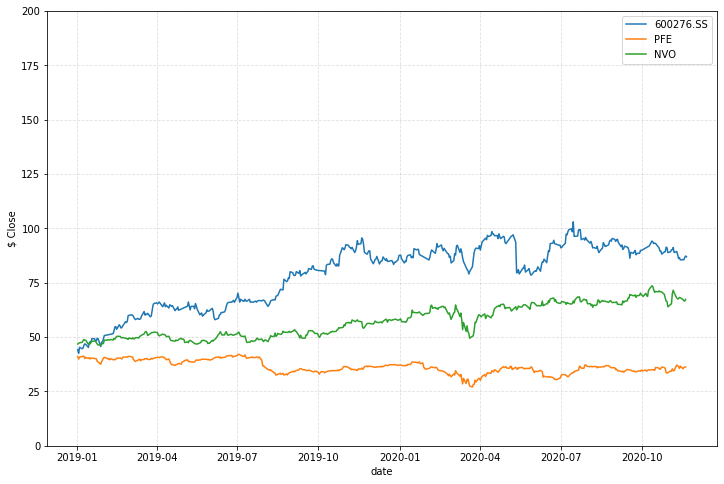

In [ ]:
plot_Stock_Price("2019-01-01", "2020-11-19", "600276.SS", "PFE", "NVO", figsize=(12,8))

In [ ]:
def trade(stockname: str, start_date: str, end_date: str, investmentValue: int):
    df = data.get_data_yahoo(stockname, start_date, end_date)
    plot_Stock_Price(start_date, end_date, stockname)

    out = df.iloc[-1]["Close"]/df.iloc[0]["Close"] * investmentValue
    print(f"Investment: {investmentValue}\n")
    print(f"Return: {out}\n")
    gain = out - investmentValue
    print(f"Gain: {gain}\n")

    days = (df.index[-1] - df.index[0]).days
    annualRateOfReturn = ((gain / investmentValue)**(1/days) - 1)*365
    print(f"Annual rate of return: {annualRateOfReturn}\n" )


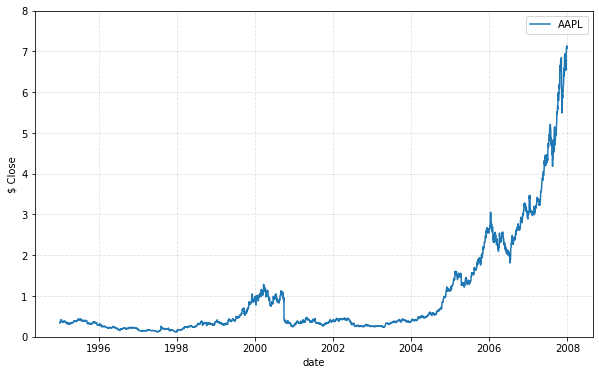

Investment: 10000

Return: 206467.7438336134

Gain: 196467.7438336134

Annual rate of return: 0.2291421400514082



In [ ]:
trade("AAPL", "1995-01-01", "2008-01-01", 10000)

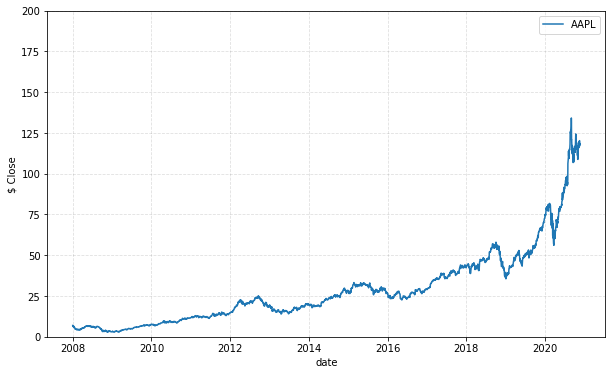

Investment: 10000

Return: 168626.5599921936

Gain: 158626.5599921936

Annual rate of return: 0.21443784939528476



In [ ]:
trade("AAPL", "2008-01-01", "2020-11-20",  10000)

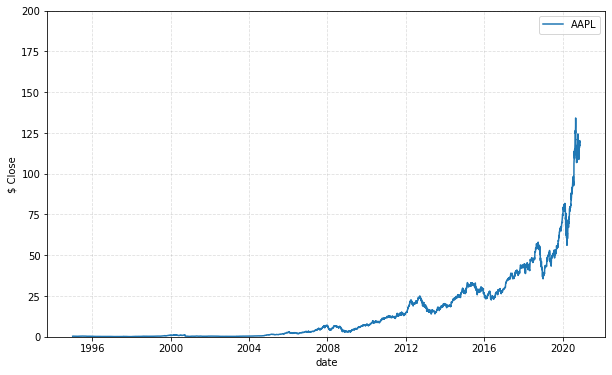

Investment: 10000

Return: 3424646.1046368466

Gain: 3414646.1046368466

Annual rate of return: 0.22530319821553957



In [ ]:
trade("AAPL", "1995-01-01", "2020-11-20", 10000)

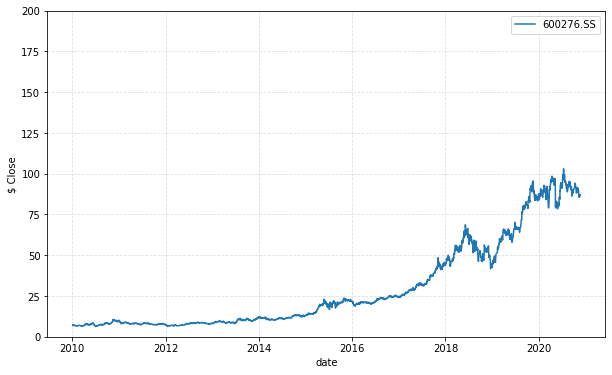

Investment: 10000

Return: 119228.57851587399

Gain: 109228.57851587399

Annual rate of return: 0.21971448950063754



In [ ]:
trade("600276.SS", "2010-01-01", "2020-11-20", 10000)

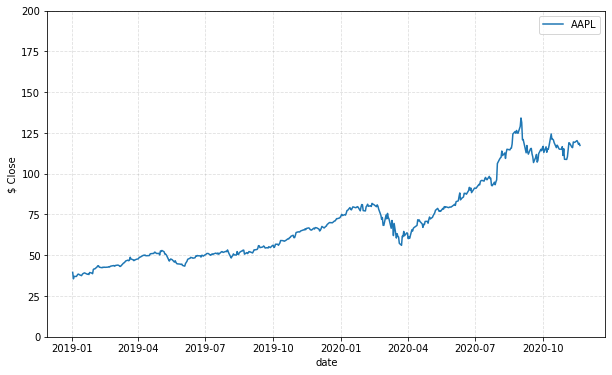

Investment: 10000

Return: 29721.37732989547

Gain: 19721.37732989547

Annual rate of return: 0.36046582134537375



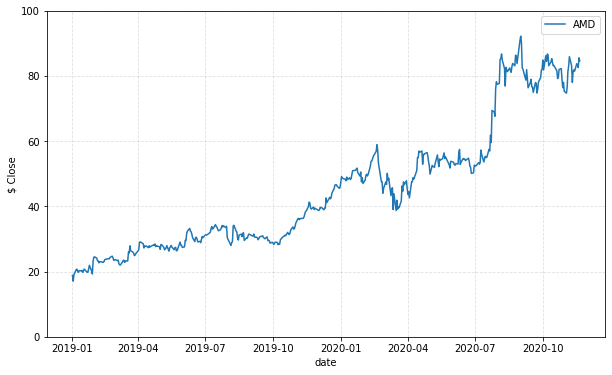

Investment: 10000

Return: 44949.54845065655

Gain: 34949.54845065655

Annual rate of return: 0.6644586710584521



In [ ]:
trade("AAPL", "2019-01-01", "2020-11-20", 10000)
trade("AMD", "2019-01-01", "2020-11-20", 10000)
